<a href="https://colab.research.google.com/github/isakhammer/numerical-mathematics-project-2/blob/master/project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Main Concept**

Compare Integrators, and ODE-networks vs Hamilton Networks. 


**Generate Synthetic Input Data**


Synthetic data is "any production data applicable to a given situation that are not obtained by direct measurement"


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
"""

def RK4(x0, t0, T, f, h):
  N = (T - t0)/h
  
  xi = x0
  ti = t0
  while ti < T:
    k1 = f(xi, ti)
    k2 = f(xi + h*k1*0.5, ti + h*0.5)
    k3 = f(xi + h*k2*0.5, ti + h*0.5)
    k4 = f(xi + h*k3, ti + h)
    xi += (h/6)*(k1 + k2*2 + k3*2 +k4) 
"""

'\n\ndef RK4(x0, t0, T, f, h):\n  N = (T - t0)/h\n  \n  xi = x0\n  ti = t0\n  while ti < T:\n    k1 = f(xi, ti)\n    k2 = f(xi + h*k1*0.5, ti + h*0.5)\n    k3 = f(xi + h*k2*0.5, ti + h*0.5)\n    k4 = f(xi + h*k3, ti + h)\n    xi += (h/6)*(k1 + k2*2 + k3*2 +k4) \n'

In [4]:


"""
Symplectic Euler Method.

Notation:
d - dimensions of p,q
p - Generalized Coordinates
q - Conjugate momenta
V -  Potential energy function
T - Kinetic energy function

Input:
 p0: (d,1) numpy array of inital values
 q0: (d,1) numpy array of inital values
 t0: Inital time
 T:  Terminal time
 dV: Function dV(q)/dq
 dT: Function dT(p)/dp
Output:
  q: (d, N) numpy array of all values from t0,T
  p: (d, N) numpy array of all values from t0,T
  t: (1, N) numpy array for time

"""

def symplectic_euler_method(p0, q0, t0, T, h, dV, dT):
  
  N = int(T/h)
  p = np.zeros((p0.shape[0], N))
  q = np.zeros((q0.shape[0], N))
  t = np.zeros((1, N))

  p[0] = p0
  q[0] = q0
  t[0] = t0

  for i in range(N):
    q[:,i] = q[:,i-1] + h*dT(p[:,i-1])
    p[: n,i] = p[:,i-1] - h*dT(q[:,i])
    t[:,i] = t[:,i-1] + h

  return p,q,t



Størmer-Verlet is formulated as 
$$
\begin{align}
p_{n+1/2} &= p_n - \frac{\Delta t}{2} \frac{\partial V}{\partial q} (q_n) \\
q_{n+1} &= q_n + \Delta t \frac{\partial T}{\partial p} (p_{n + 1/2}) \\
p_{n+1} &= p_{n + 1/2} - \frac{\Delta t}{2} \frac{\partial V}{\partial q} (q_{n+1})
\end{align}
$$

Source: Equation (14) in the project description.

In [5]:

"""
Stormler Vermet.

Notation:
d - dimensions of p,q
p - Generalized Coordinates
q - Conjugate momenta
V -  Potential energy function
T - Kinetic energy function

Input:
 p0: (d,1) numpy array of inital values
 q0: (d,1) numpy array of inital values
 t0: Inital time
 T:  Terminal time
 dV: Function dV(q)/dq
 dT: Function dT(p)/dp
Output:
  q: (d, N) numpy array of all values from t0,T
  p: (d, N) numpy array of all values from t0,T
  t: (1, N) numpy array for time

"""

def stormer_verlet(p0, q0, t0, T, h, dV, dT):
  
  N = int(T/h)
  p = np.zeros((p0.shape[0], N))
  q = np.zeros((q0.shape[0], N))
  t = np.zeros((1, N))

  p[0] = p0
  q[0] = q0
  t[0] = t0

  for i in range(N):
    phat = p[:,i-1] - 0.5*h*dV(q[:,i-1])
    q[:, i] = q[:, i-1] + h*dT(phat)
    p[:, i] = phat - 0.5*h*dT(q[:,i])
    t[:,i] = t[:,i-1] + h

  return p,q,t


**Non-linear Pendulum Example**

Let the hamiltion function be
$$
H(p,q) = T(p,q) + V(p,q) = (1/2)\cdot p^T p - cos(q) 
$$
then is the derivates mentioned as

$$
\begin{align}
\frac{\partial H (p,q)}{ \partial p} &= \frac{\partial T (p,q)}{ \partial p} = p \\
\frac{\partial H (p,q)}{ \partial q} &= \frac{\partial V (p,q)}{ \partial q} = cos(q)
\end{align}
$$


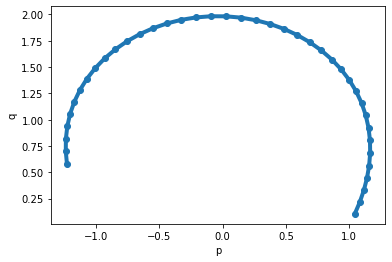

In [6]:
def dV_pendulum(q):
  return -np.cos(q)

def dT_pendulum(p):
  return p


def non_linear_pendulum():
  
  q0 = np.array([0])
  p0 = np.array([1])

  T = 4
  t0 = 0
  h = 0.1
  p, q, t = stormer_verlet(p0, q0, t0, T, h, dV_pendulum, dT_pendulum)

  plt.title("")
  plt.scatter(p,q)
  plt.plot(p[0], q[0],  linewidth=4) 
  plt.xlabel("p")
  plt.ylabel("q")
  plt.plot()

non_linear_pendulum()


In [8]:
def dV_kepler(q):
  return 
  
def dT_kepler(p):
  return p


def kepler_two_body():

  q0 = np.array([0])
  p0 = np.array([1])

  T = 4
  t0 = 0
  h = 0.1
  p, q, t = symplectic_euler_method(p0, q0, t0, T, h, dV_pendulum, dT_pendulum)

  plt.title("")
  plt.scatter(p,q)
  plt.plot(p[0], q[0],  linewidth=4) 
  plt.xlabel("p")
  plt.ylabel("q")
  plt.plot()




In [9]:
import random as r


def sigmoid(x):
  return np.tanh(x)
  

def identity(x):
  return x

def train_neural_network():

  # activation function.
  sigma = identity

  # inital values.
  K = 10
  tau = 10
  h = 0.1
  dim = 10
  Y0 = np.random.rand(dim)
  tol =  0.1
  
  # Make random inital valyues.
  while (np.linalg.norm(e) > tol ):
    for k in range(K):
      #compute Zk from (4)
      Z[k+1] = Zk + h*sigma(Ak@Zk + bk) 
    
    # Compute P^k from (10)
    # Calculate projection (8),(9)
    for k in (K-1):
      # Compute (12) and (13)
    
    # Update W_k and b_k as in (7) or from Adam Method. 

    # If adam good, return true. 


IndentationError: ignored